In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("week3.csv")

In [4]:
data['Date'] = pd.to_datetime(data.Date)
data.sort_values(by = "Date", ascending = False, inplace = True)
data.set_index("Date", inplace=True)

In [5]:
data.head()

,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,Volume,VWAP,Day_Perc_Change,Trend,Avg_Trend,Median_Trend,SME20,BOLU,BOLD,TP
Date,,,,,,,,,,,,,,,,,
2019-10-24,139.94,139.14,140.40,138.69,37.28M,10,2019,37.2,139.940000,0.028668,Slight or No Change,28.28247,25.7,1930.63,2398.925509,1462.334491,139.676667
2019-10-23,137.24,136.88,137.45,135.61,31.38M,10,2019,31.3,138.706277,-0.019294,Slight or No Change,28.28247,25.7,1926.80,2395.095509,1458.504491,136.766667
2019-10-22,136.37,138.97,140.01,136.26,27.94M,10,2019,27.9,138.030114,-0.006339,Slight or No Change,28.28247,25.7,1924.65,2392.945509,1456.354491,137.546667
2019-10-21,138.43,138.45,138.50,137.01,20.72M,10,2019,20.7,138.100803,0.015106,Slight or No Change,28.28247,25.7,1925.69,2393.985509,1457.394491,137.980000
2019-10-18,137.41,139.76,140.00,136.56,32.28M,10,2019,32.2,137.951815,-0.007368,Slight or No Change,28.28247,25.7,1926.77,2395.065509,1458.474491,137.990000


In [6]:
def set_call(row):
    stock = row["Close Price"]
    bold = row.BOLD
    sme = row.SME20
    bolu = row.BOLU
    if stock<bold:
        return "Buy"
    elif stock>row.BOLD and stock<sme:
        return "Hold Buy/ Liquidate Short"
    elif stock>sme and stock<bolu:
        return "Hold Short/ Liquidate Buy"
    else:
        return "Short"
data["Call"] = data.apply(set_call, axis=1)

In [7]:
data.dropna(inplace=True)

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

In [9]:
X = []  
y = []
for idx, row in data.iterrows(): 
    my_list =[row["Close Price"], row.BOLD, row.SME20, row.BOLU] 
    y.append(row.Call)
    X.append(my_list) 

In [10]:
my_dict = {}
my_dict["Buy"] = 0
my_dict["Hold Buy/ Liquidate Short"] = 1
my_dict["Hold Short/ Liquidate Buy"] = 2
my_dict["Short"] = 3
y_encoded = []
for i in y:
    y_encoded.append(my_dict[i])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded)
model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
y_pred = model.predict(X_test)

In [12]:
np.sum(y_pred == y_test)/len(y_test)

1.0

In [13]:
data = pd.read_csv("./MID_CAP/DHFL.csv")

In [14]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,DHFL,EQ,15-May-2017,426.65,429.5,434.4,427.05,431.0,431.4,430.94,1160661,500175906.3,15111,295581,25.47
1,DHFL,N6,15-May-2017,1007.25,1009.9,1009.9,1009.90,1009.9,1009.9,1009.90,50,50495.0,1,50,100.00
2,DHFL,N8,15-May-2017,1055.00,1055.2,1055.2,1055.20,1055.2,1055.2,1055.20,48,50649.6,2,48,100.00
3,DHFL,NaN,15-May-2017,1070.00,1070.0,1070.0,1070.00,1070.0,1070.0,1070.00,1,1070.0,1,1,100.00
4,DHFL,NB,15-May-2017,1040.00,1050.0,1050.0,1050.00,1050.0,1050.0,1050.00,6,6300.0,1,6,100.00


In [15]:
data["SME20"] = data["Close Price"].rolling(14).sum()
std = data["SME20"].std()
data["BOLU"] = data["SME20"] + 2*std
data["BOLD"] = data["SME20"] - 2*std
data["TP"] = (data["High Price"] + data["Low Price"] + data["Close Price"]) / 3

In [16]:
data.dropna(inplace=True)

In [17]:
X = []  
for idx, row in data.iterrows(): 
    my_list =[row["Close Price"], row.BOLD, row.SME20, row.BOLU] 
    X.append(my_list) 

In [18]:
y_pred = model.predict(X)

In [19]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
calls = []

In [21]:
for p in y_pred:
    if p == 0:
        calls.append("Buy")
    elif p==1:
        calls.append("Hold Buy/ Liquidate Short")
    elif p==2:
        calls.append("Hold Short/ Liquidate Buy")
    elif p==3:
        calls.append("Short")
    

In [22]:
data["Call"] = calls

In [23]:
data = pd.read_csv("./Large_Cap/RELIANCE.csv")

In [24]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
3,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
4,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32


In [25]:
data["per_open_close"] = ((data["Close Price"] - data["Open Price"])/data["Open Price"]) * 100
data["per_low_high"] = ((data["High Price"] - data["Low Price"])/data["Low Price"]) * 100
data["roll_mean"] = data["Close Price"].pct_change().dropna().rolling(5).mean()
data["roll_std"] = data["Close Price"].pct_change().dropna().rolling(5).std()
data = data.dropna()

In [26]:
close_prices = list(data["Close Price"])

In [27]:
actions = [1 if close_prices[i+1]>close_prices[i] else -1 for i in range(len(close_prices)-1)]

In [28]:
data = data[:-1]

In [29]:
data["Action"] = actions

In [30]:
data = data.dropna()

In [31]:
data.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,per_open_close,per_low_high,roll_mean,roll_std,Action
489,RELIANCE,EQ,06-May-2019,1408.85,1398.0,1402.8,1378.10,1382.95,1384.90,1392.39,7237910,1.007802e+10,151864,3763775,52.00,-0.937053,1.792323,0.001873,0.012011,-1
490,RELIANCE,EQ,07-May-2019,1384.90,1394.8,1395.0,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81,-3.677947,4.088942,-0.007079,0.015943,-1
491,RELIANCE,EQ,08-May-2019,1343.50,1340.0,1340.0,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38,-3.026119,3.699118,-0.013636,0.018792,-1
492,RELIANCE,EQ,09-May-2019,1299.45,1288.8,1288.8,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65,-2.510087,2.959856,-0.022013,0.015305,-1
493,RELIANCE,EQ,10-May-2019,1256.45,1265.0,1277.7,1245.00,1245.75,1251.15,1263.56,11226831,1.418577e+10,231193,3221387,28.69,-1.094862,2.626506,-0.023398,0.012581,-1


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
X = data[["per_open_close", "per_low_high", "roll_mean", "roll_std"]]
y = data["Action"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = RandomForestClassifier(n_estimators = 100, max_depth=2, random_state=1) 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.52      0.28      0.36        57
           1       0.55      0.77      0.65        66

    accuracy                           0.54       123
   macro avg       0.54      0.53      0.50       123
weighted avg       0.54      0.54      0.51       123



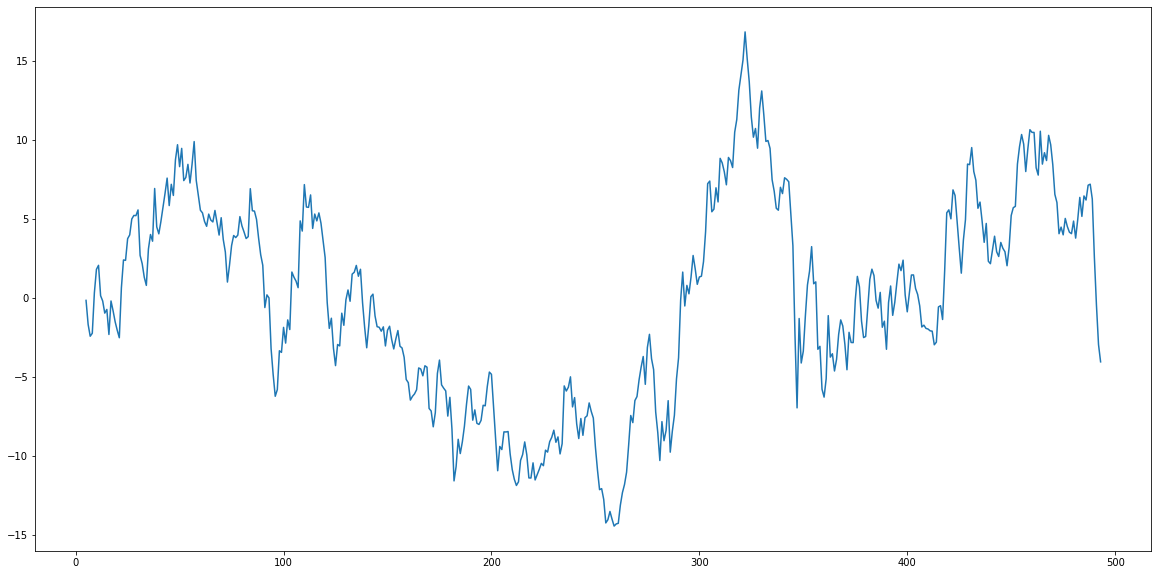

In [38]:
data['Net Cummulative Returns'] = (((data['Close Price'] - data['Open Price'])/(data['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(data['Net Cummulative Returns'])